# Forecasting con Keras

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize =(16,12))
plt.rc("font", size=13)

## Obtenemos y describimos los datos

In [3]:
data = pd.read_csv("NVDA.csv", parse_dates = True)
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,117.895343,120.210810,115.457117,117.923000,117.661785,4.763272e+07
std,72.933706,74.575362,71.041797,72.851590,72.899010,2.233558e+07
min,31.622499,32.494999,31.115000,31.770000,31.537212,9.788400e+06
25%,56.957501,58.117501,55.655000,56.683750,56.170145,3.186180e+07
50%,105.632500,106.552498,103.470001,105.107498,104.855309,4.400920e+07
75%,162.714996,168.279999,159.794998,164.305001,164.259789,5.884995e+07
max,335.170013,346.470001,320.359985,333.760010,333.407379,2.511528e+08


## Información de los datos 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


### Establecemos el tiempo como índice

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

## El Precio de cierre
El último precio al que se negocian las acciones durante el día

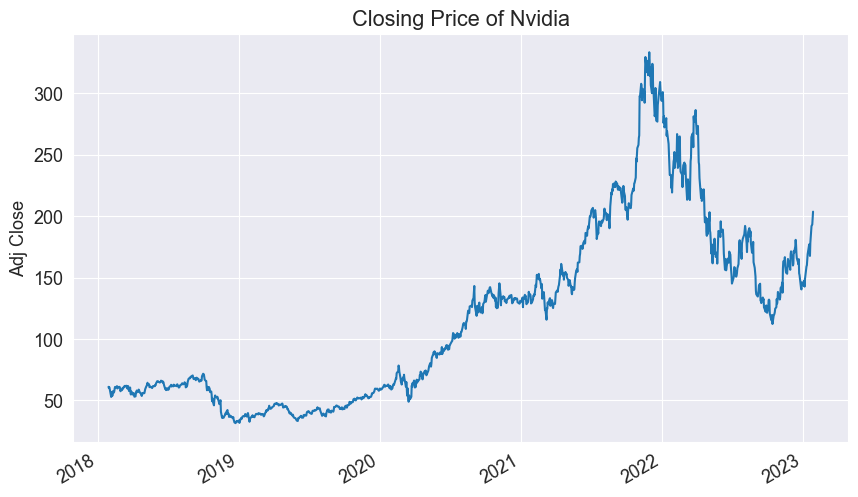

In [9]:
plt.figure(figsize=(10, 6))

data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Nvidia")
    
plt.show()

## Volumen de ventas
Cantidad de negociaciones del activo por día

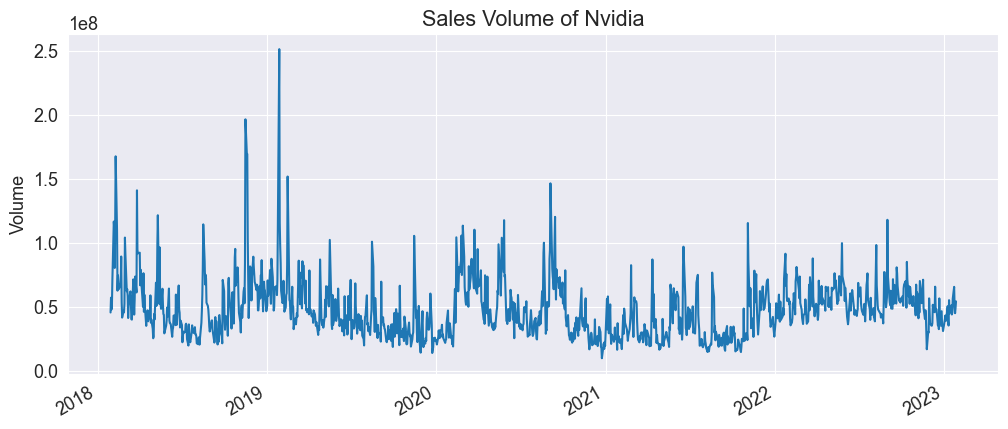

In [12]:
plt.figure(figsize=(12, 5))

data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume of Nvidia")
    
plt.show()

## Moving Average (MA)
Suaviza los datos del precio creando un promedio actualizado constantemente

Text(0.5, 1.0, 'NVDIA')

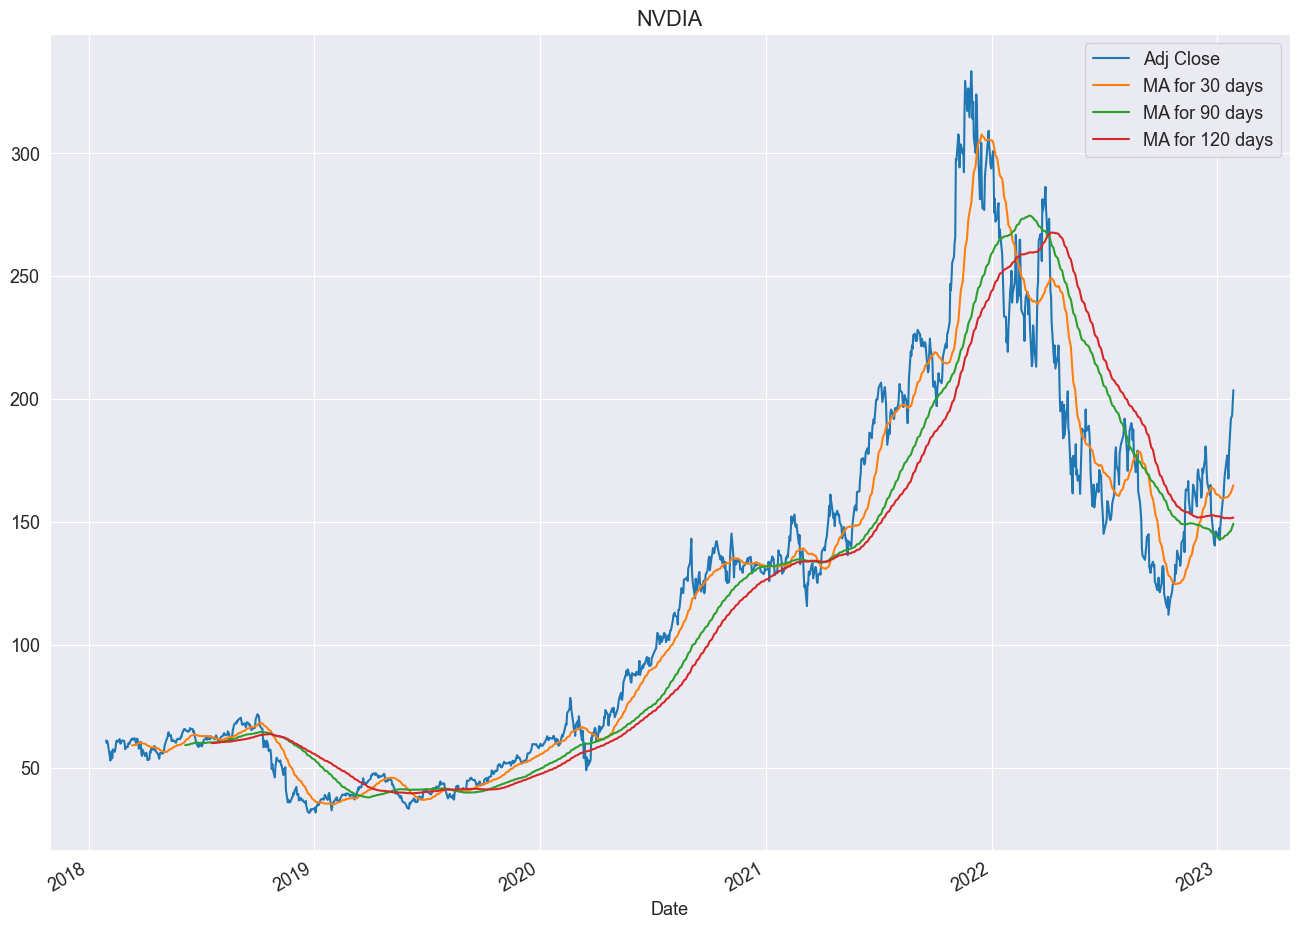

In [39]:
ma_day = [30, 90, 120]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data["Adj Close"].rolling(ma).mean()

data[['Adj Close', 'MA for 30 days', 'MA for 90 days', 'MA for 120 days']].plot().set_title('NVDIA')

## Retorno diario en promedio por la acción 
Es analizar el "riesgo" de la acción, observando más de cerca los cambios diarios y no solo su valor absoluto

Text(0.5, 1.0, 'NVDIA')

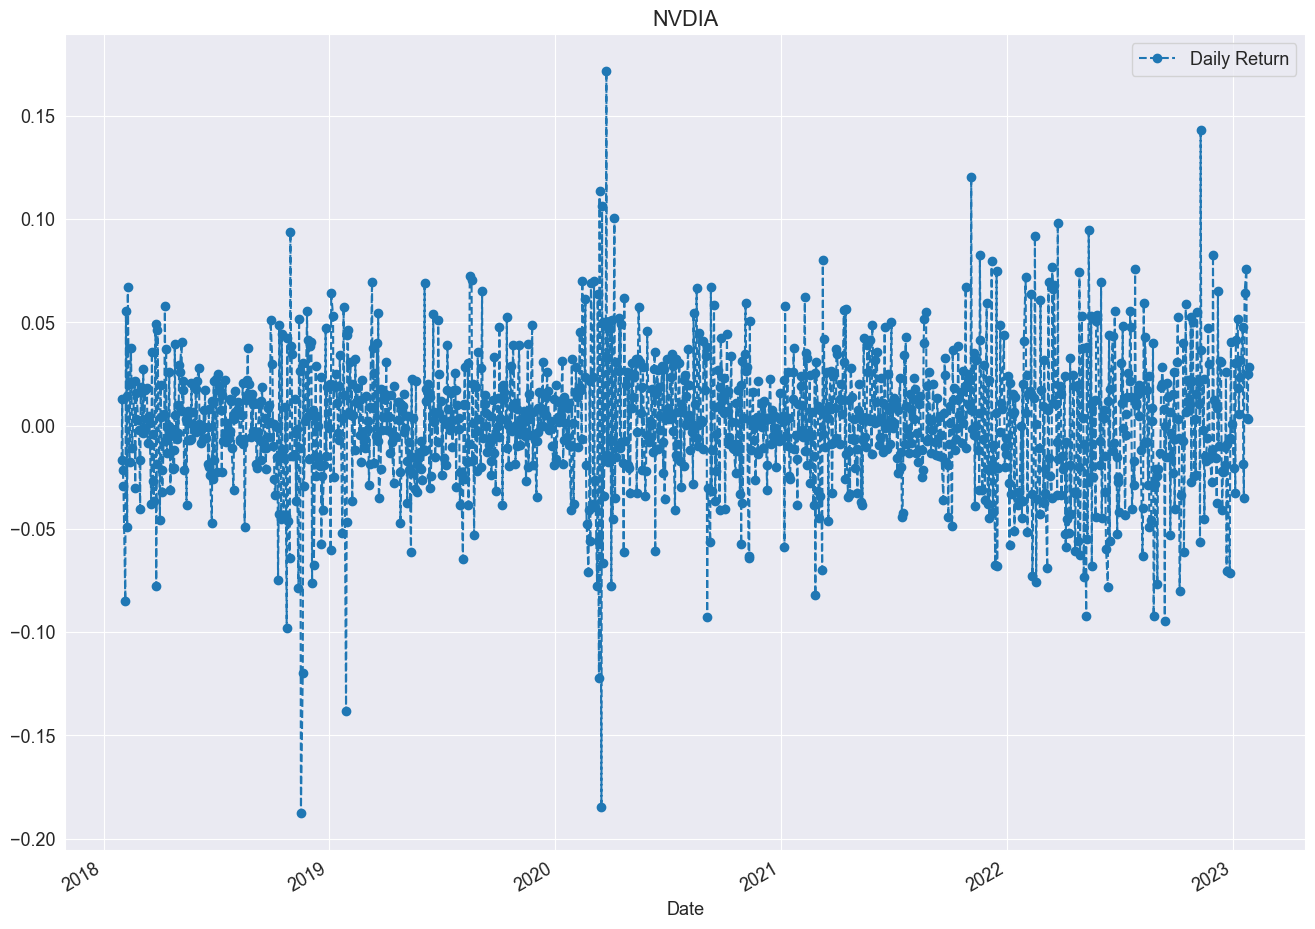

In [40]:
data['Daily Return'] = data['Adj Close'].pct_change()    
data[["Daily Return"]].plot(legend=True, linestyle='--', marker='o').set_title('NVDIA')

## Histograma del rendimiento diario promedio

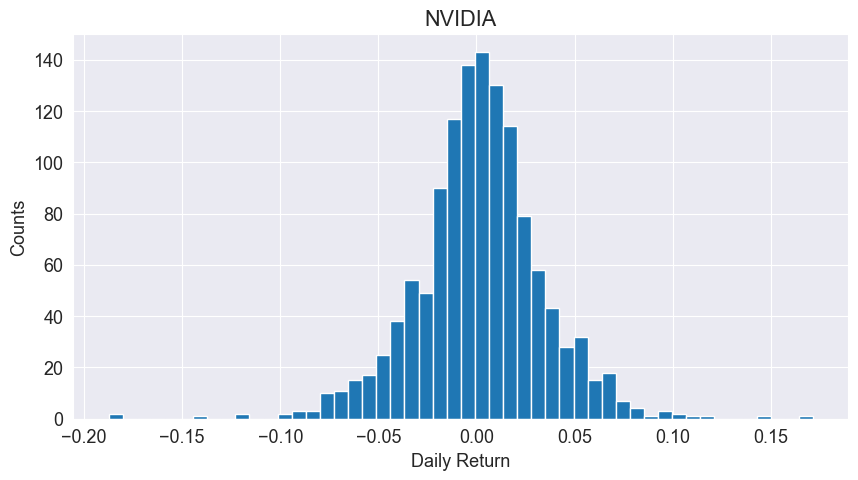

In [45]:
plt.figure(figsize=(10, 5))

data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('NVIDIA')

plt.show()

## Predicción del precio de las acciones de NVIDIA

In [61]:
# Creamos un dataFrame de una sola columna
price = data.filter(['Close'])
# Conversión a un numpy array
valores = price.values
# Seleccionamos la cantidad de datos con las cuales entrenaremos el modelo
datos_train = int(np.ceil( len(valores) * 0.90))

datos_train

1134

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(valores)

scaled_data

array([[0.09915064],
       [0.09573164],
       [0.0982814 ],
       ...,
       [0.53465343],
       [0.55051491],
       [0.56915788]])

In [63]:
# Creamos el conjunto de datos de entrenamiento
# Creamos el conjunto escalado de datos de entrenamiento
train_data = scaled_data[0:int(datos_train),:]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.09915064, 0.09573164, 0.0982814 , 0.09389383, 0.0881155 ,
       0.07170767, 0.08154243, 0.08420809, 0.07487003, 0.08692341,
       0.08357065, 0.08737872, 0.09465545, 0.09886089, 0.09665882,
       0.10099672, 0.09472995, 0.09525977, 0.09838901, 0.09892711,
       0.09849663, 0.0951356 , 0.08703103, 0.09061557, 0.08987879,
       0.09526806, 0.09500314, 0.09445676, 0.09789231, 0.10155965,
       0.09986258, 0.10071526, 0.10121195, 0.10215569, 0.09430776,
       0.10141064, 0.10056624, 0.09501143, 0.08766018, 0.09718864,
       0.08149277, 0.07804067, 0.08651776, 0.07779231, 0.08135204,
       0.08208881, 0.0780655 , 0.07216298, 0.07312328, 0.08347131,
       0.08208881, 0.08900957, 0.08644326, 0.08643498, 0.09144342,
       0.09047484, 0.08440676, 0.08413358, 0.0801351 , 0.07791648])]
[0.07415808556051239]

[array([0.09915064, 0.09573164, 0.0982814 , 0.09389383, 0.0881155 ,
       0.07170767, 0.08154243, 0.08420809, 0.07487003, 0.08692341,
       0.08357065, 0.08737872, 0.09

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Construimos el modelo LSTM(Long-Short Term Memory layer)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1074/1074 [==============================] - 23s 19ms/step - loss: 0.0026
Epoch 2/5
1074/1074 [==============================] - 21s 19ms/step - loss: 0.0012
Epoch 3/5
1074/1074 [==============================] - 22s 20ms/step - loss: 0.0014
Epoch 4/5
1074/1074 [==============================] - 21s 19ms/step - loss: 6.4360e-04
Epoch 5/5
1074/1074 [==============================] - 21s 19ms/step - loss: 6.3203e-04


In [66]:
# Crear el conjunto de datos de prueba
# Create a new array containing scaled values from index 1543 to 2002
# Crea un nuevo array conteniendo valores escalados desde el indíce 1543 hasta 2002
test_data = scaled_data[datos_train - 60: , :]
# Crear el conjunto de datos x_test y y_test
x_test = []
y_test = valores[datos_train:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 23ms/step


7.286137530737381

C:\Users\Adrián Vázquez\AppData\Local\Temp\ipykernel_3248\1732500128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


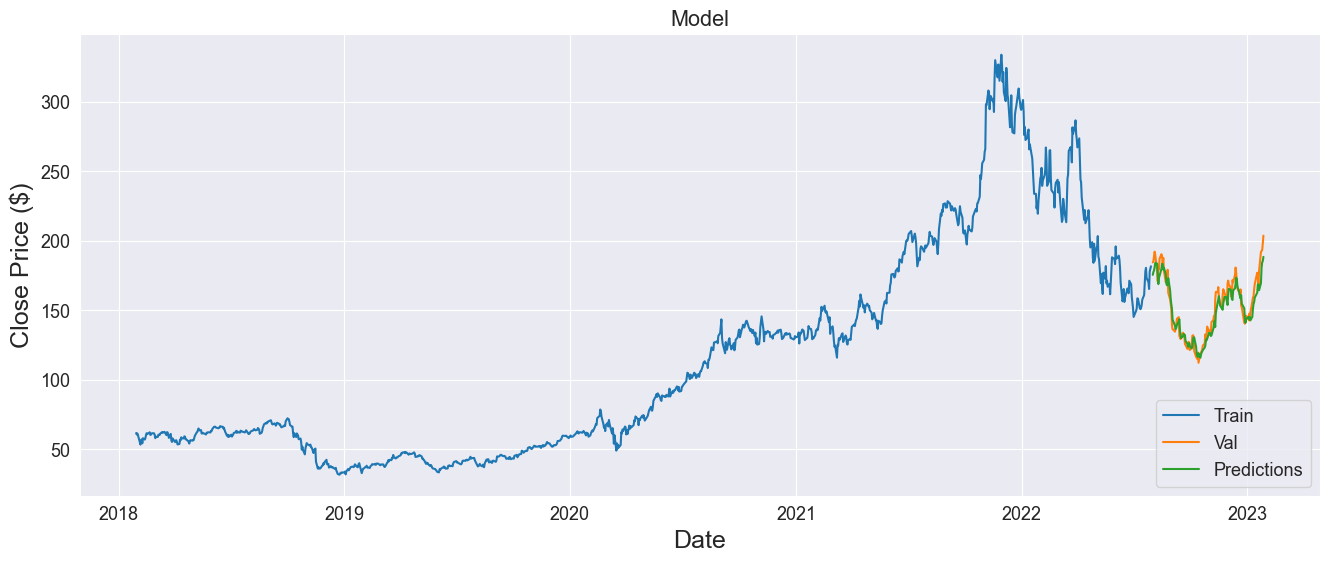

In [67]:
# Plot the data
train = data[:datos_train]
valid = data[datos_train:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()